## Load Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

In [5]:
data = pd.read_csv('Shopping_Customers_dataset.csv', index_col=0)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [6]:
data.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [7]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## visualization

*   First we try to find any kind of Noise in dataset
*   If we found our dataset clear, we start Clustering dataset




In [8]:
print(f'count of null data in each Feature:\n{data.isnull().sum()}')

count of null data in each Feature:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
print(f' type of data in each Feature:\n{data.dtypes}')

 type of data in each Feature:
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


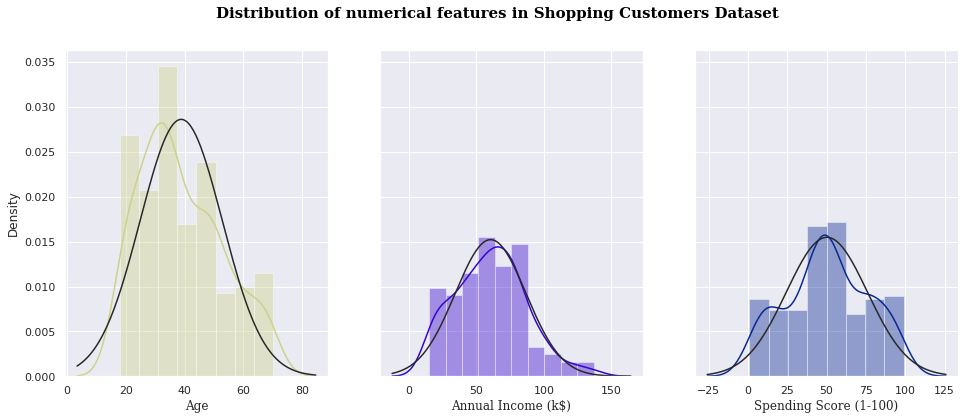

In [12]:
from scipy.stats import norm
numerical = data.drop('Gender', axis=1)
col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.set()

fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

fig.suptitle("Distribution of numerical features in Shopping Customers Dataset", fontfamily='serif',
             fontsize=15, fontweight='bold', color='black')

for num, column in enumerate(col):
  a = random.random()
  b = random.random()
  c = random.random()
  color = (a, b, c) 
  sns.distplot(ax=axes[num],x =numerical[column], color= color,fit=norm)
  axes[num].set_xlabel(column,  fontfamily='serif', fontsize=12)  
plt.show()

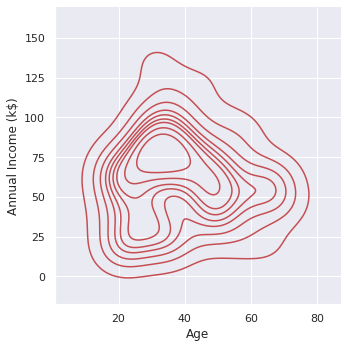

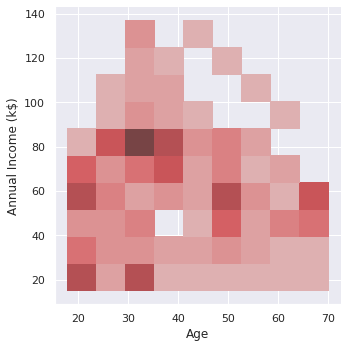

In [13]:
sns.displot(data=data, x='Age', y='Annual Income (k$)', color='r', kind='kde')
sns.displot(data=data, x='Age', y='Annual Income (k$)', color='r')

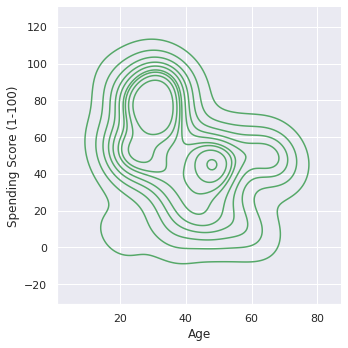

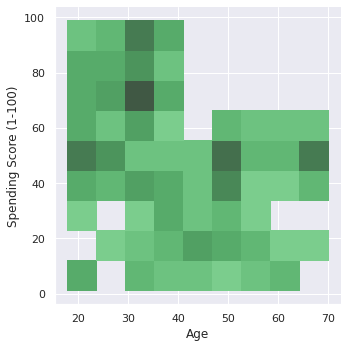

In [14]:
sns.displot(data=data, x='Age', y='Spending Score (1-100)', color='g', kind='kde')
sns.displot(data=data, x='Age', y='Spending Score (1-100)', color='g')

<Figure size 800x800 with 0 Axes>

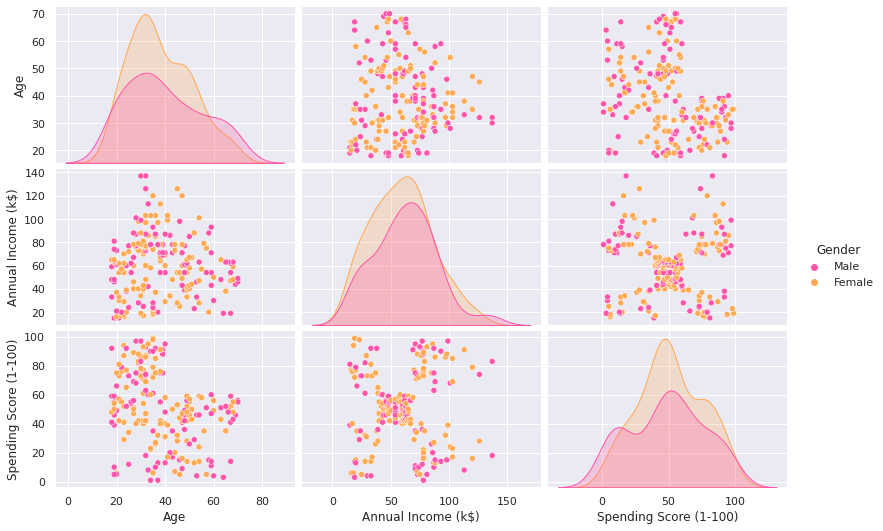

In [15]:
plt.figure(figsize=(10, 10), dpi=80)
sns.pairplot(data, hue='Gender', palette='spring',  aspect=1.5)
plt.show()

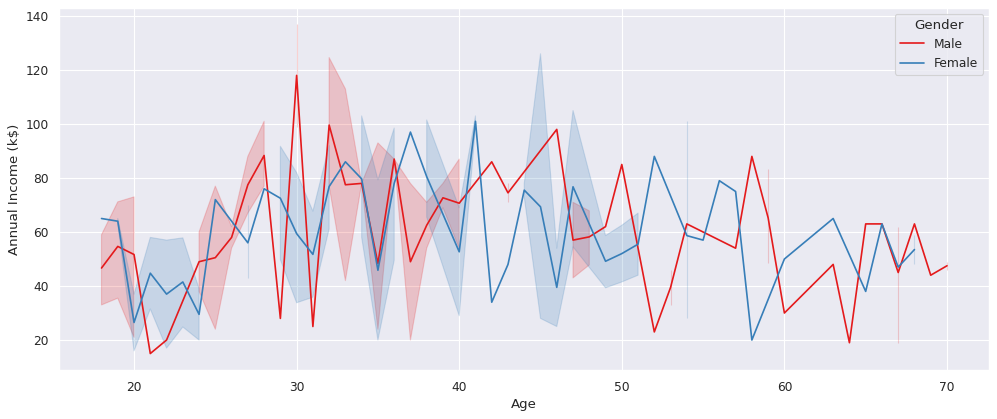

In [16]:
plt.figure(figsize=(15, 6), dpi=80)
sns.lineplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data, palette='Set1')
plt.show()

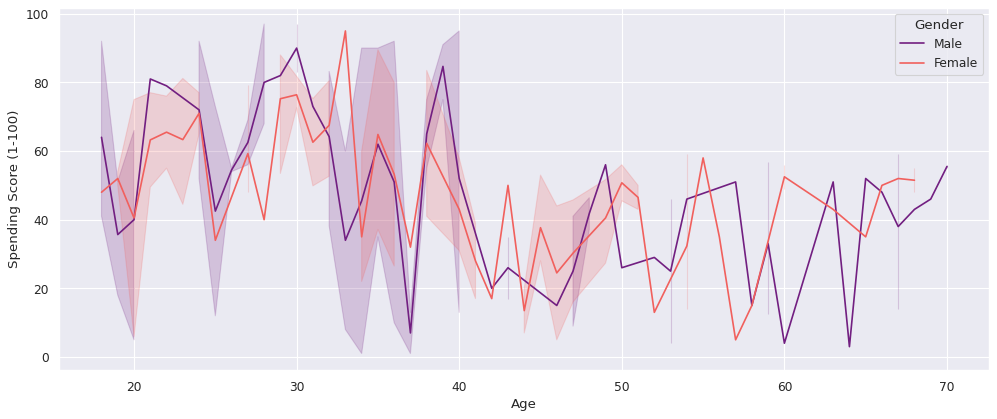

In [20]:
plt.figure(figsize=(15, 6), dpi=80)
sns.lineplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data, palette='magma')
plt.show()

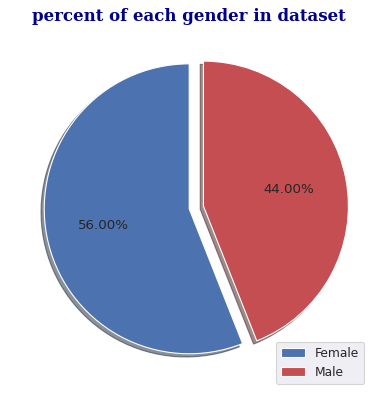

In [22]:
plt.figure(figsize=(6, 6), dpi=80)
plt.pie(data.Gender.value_counts(),explode=(0, 0.1), autopct='%1.2f%%', colors=['b', 'r'],
        startangle=90, shadow=True)
plt.legend(['Female', 'Male'])
plt.title('percent of each gender in dataset', 
          color='darkblue',fontfamily='serif', fontsize=15, fontweight='bold')
plt.show()

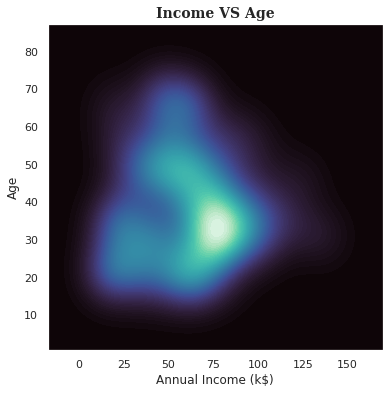

In [ ]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data = data, x='Annual Income (k$)', y='Age',
                 fill=True, thresh=0, levels=100, cmap="mako")
plt.title('Income VS Age', fontweight='bold', fontsize=14, fontfamily='serif')
plt.show()

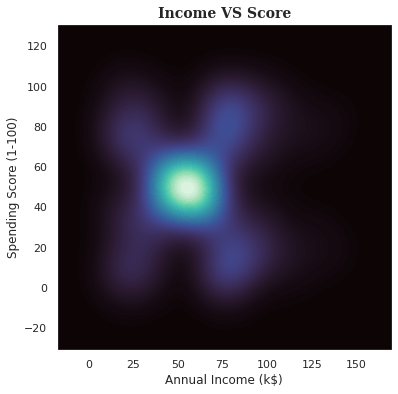

In [ ]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data = data, x='Annual Income (k$)', y='Spending Score (1-100)',
                 fill=True, thresh=0, levels=100, cmap="mako")
plt.title('Income VS Score', fontweight='bold', fontsize=14, fontfamily='serif')
plt.show()

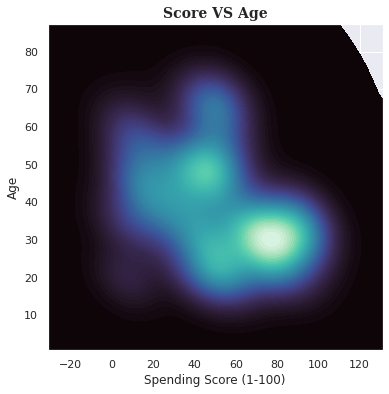

In [ ]:
plt.figure(figsize=(6, 6))
sns.kdeplot(data = data, y='Age', x='Spending Score (1-100)',
                 fill=True, thresh=0, levels=100, cmap="mako")
plt.title('Score VS Age', fontweight='bold', fontsize=14, fontfamily='serif')
plt.show()

**Check Correlation between vars before encoding Gender var**

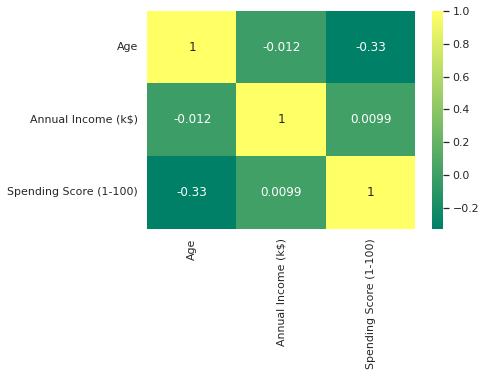

In [ ]:
sns.heatmap(data.corr(), annot= True, cmap='summer')
plt.show()

## *Encoding String variables*

Define Encoder Function

In [25]:
from sklearn.preprocessing import LabelEncoder
df = data.copy()
# df_lbl = pd.DataFrame()
def Encodel_lbl(features_val, columns_name):
  lbl = LabelEncoder()
  labels = lbl.fit_transform(features_val)
  df[columns_name + '_label'] = labels

In [26]:
columns = ['Gender']
for column in columns:
  Encodel_lbl(df[column], column)

In [27]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [28]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_label
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0
...,...,...,...,...,...
196,Female,35,120,79,0
197,Female,45,126,28,0
198,Male,32,126,74,1


**Check correlation after encoding**

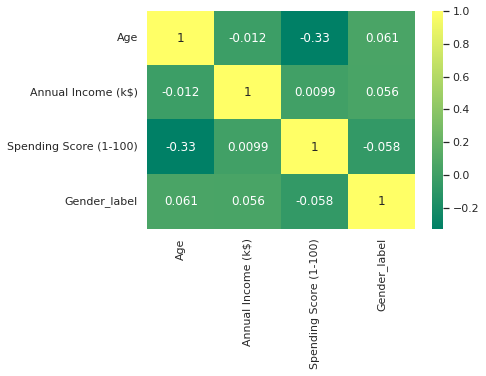

In [29]:
sns.heatmap(df.corr(), annot= True, cmap='summer')
plt.show()

## **Kmean Cluster Models**

> **KMean Cluster**



In [40]:
df_kmean = df.copy()
df_kmean.drop('Gender', axis=1, inplace=True)
df_kmean.drop('Gender_label', axis=1, inplace=True)

In [41]:
df_kmean

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74




> Normalized data



In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_kmean)

In [ ]:
# scaled_features

In [44]:
# !pip install kneed
from sklearn.cluster import KMeans
from kneed import KneeLocator

kmeans_set = {'init':'random', 'n_init':10, 'max_iter': 300, 'random_state':0}
List = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

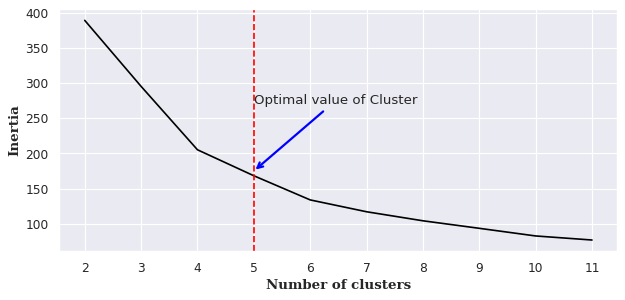

In [45]:
k1 = KneeLocator(range(2, 12), List, curve='convex', direction='decreasing')

plt.figure(figsize=(9, 4), dpi=80)
plt.plot(range(2, 12), List, color='black')
plt.xticks(range(2, 12))
plt.xlabel('Number of clusters', fontfamily='serif', fontsize=12, fontweight='bold')
plt.ylabel('Inertia', fontfamily='serif', fontsize=12, fontweight='bold')
plt.axvline(x = k1.elbow, color='red', label='axvline - full height', ls='--')
plt.annotate('Optimal value of Cluster', xy=(5, 175), xytext=(5, 270),      
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [47]:
kmeans = KMeans(n_clusters=k1.elbow)
kmeans.fit(scaled_features)
df_kmean['label'] = kmeans.labels_

In [48]:
df_kmean.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'label'], dtype='object')

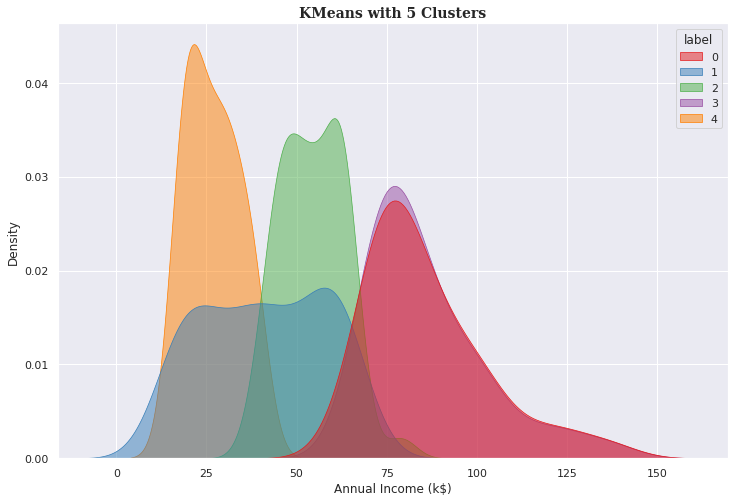

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data = df_kmean, x='Annual Income (k$)', 
                hue='label', fill=True, common_norm=False, palette="Set1",
                 alpha=.5, linewidth= 0.7)
plt.title('KMeans with 5 Clusters', fontweight='bold', fontsize=14, fontfamily='serif')
plt.show()

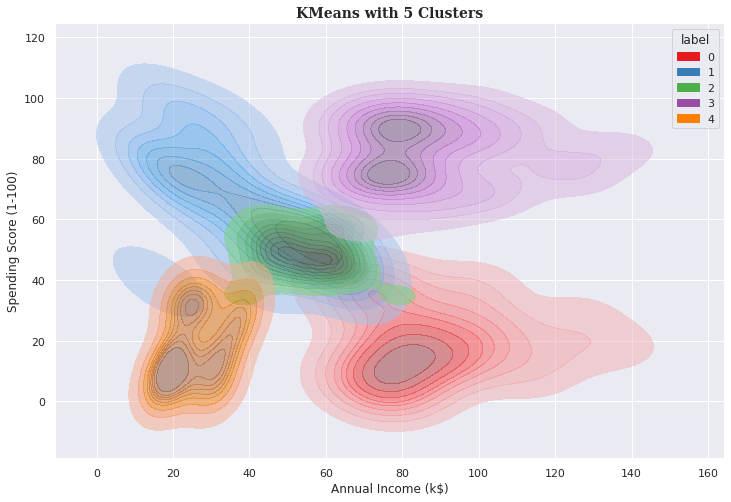

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data = df_kmean, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='label', fill=True, common_norm=False, palette="Set1",
                 alpha=.5, linewidth= 0.7)
plt.title('KMeans with 5 Clusters', fontweight='bold', fontsize=14, fontfamily='serif')
plt.show()


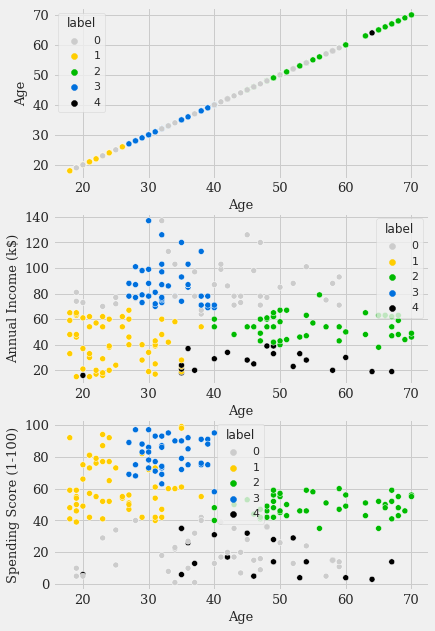

In [101]:
plt.figure(figsize=(6, 10))
for num in range(0,3):
    ax = plt.subplot(3, 1,num+1)
    col = df_kmean.columns[num]
    sns.scatterplot(ax=ax, data=df_kmean, y=df_kmean[col], x='Age', hue=df_kmean['label'], palette='nipy_spectral_r')
    plt.xticks(fontsize =13, fontfamily= 'serif')
    plt.yticks(fontsize =13, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =13, fontfamily= 'serif')
    plt.xlabel('Age',fontsize =13, fontfamily= 'serif')


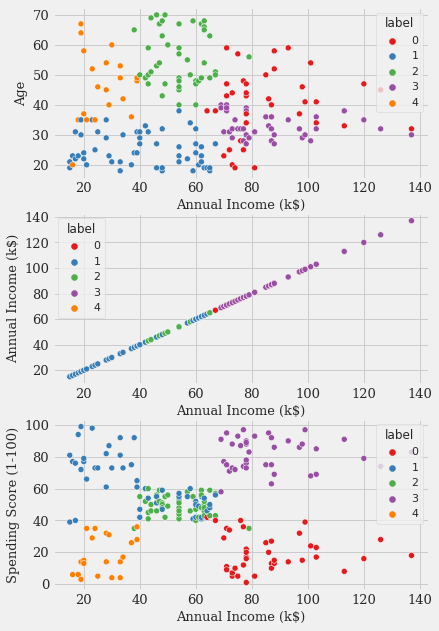

In [104]:
plt.figure(figsize=(6, 10))
for num in range(0,3):
    ax = plt.subplot(3, 1,num+1)
    col = df_kmean.columns[num]
    sns.scatterplot(ax=ax, data=df_kmean, y=df_kmean[col], x='Annual Income (k$)', hue=df_kmean['label'], palette='Set1')
    plt.xticks(fontsize =13, fontfamily= 'serif')
    plt.yticks(fontsize =13, fontfamily= 'serif')
    plt.ylabel(f'{col}',fontsize =13, fontfamily= 'serif')
    plt.xlabel('Annual Income (k$)',fontsize =13, fontfamily= 'serif')


In [144]:
df_kmean.label.value_counts()

1    54
2    47
3    40
0    39
4    20
Name: label, dtype: int64

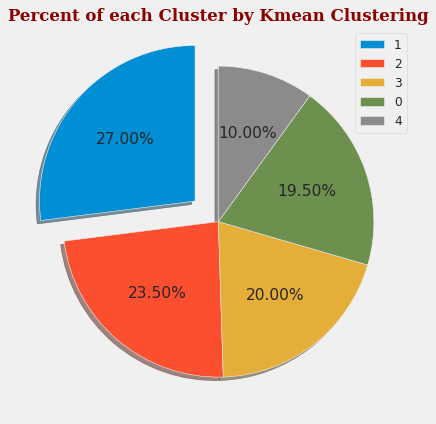

In [147]:
plt.figure(figsize=(6, 6), dpi=80)
plt.pie(df_kmean.label.value_counts(),explode=(0.2, 0, 0, 0, 0), autopct='%1.2f%%',
        startangle=90, shadow=True)
plt.legend(['1', '2', '3', '0', '4'])
plt.title('Percent of each Cluster by Kmean Clustering', color='darkred',fontfamily='serif', fontsize=15, fontweight='bold')
plt.show()

## **Accuracy Index**

In [106]:
# !pip install validclust

In [115]:
from validclust import dunn
from sklearn.metrics.pairwise import pairwise_distances

dunn_index = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    dist = pairwise_distances(scaled_features)
    kmeans.fit(scaled_features)
    score = dunn(dist, kmeans.labels_)
    dunn_index.append(score)


In [116]:
from sklearn.metrics import silhouette_score
silhouette_coefficient = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficient.append(score)

In [117]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score = calinski_harabasz_score(scaled_features, kmeans.labels_)
    calinski_harabasz.append(score)

In [118]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score = davies_bouldin_score(scaled_features, kmeans.labels_)
    davies_bouldin.append(score)

In [120]:
coefficients = pd.DataFrame({'K': range(2, 12),
                             'Inertia(Elbow)':List,
                             'dunn index': dunn_index,
                            'silhouette coefficient': silhouette_coefficient,
                            'calinski harabasz': calinski_harabasz,
                            'davies bouldin': davies_bouldin})

color = (coefficients.K ==  k1.elbow).map({True: 'background-color: blue', False: ''})
coefficients.style.apply(lambda s: color)


,K,Inertia(Elbow),dunn index,silhouette coefficient,calinski harabasz,davies bouldin
0,2,389.386189,0.059567,0.335472,107.095567,1.260682
1,3,295.456245,0.068319,0.357923,101.529619,1.032689
2,4,205.225147,0.059289,0.403958,125.676397,0.930796
3,5,168.247580,0.065936,0.416643,125.100940,0.874551
4,6,133.868334,0.055373,0.427428,135.102217,0.827743
5,7,117.011555,0.055373,0.417232,132.774309,0.793467
6,8,104.154299,0.055373,0.407638,130.578760,0.884732
7,9,93.433895,0.102761,0.409320,129.441952,0.910349
8,10,82.566303,0.067496,0.399050,132.300949,0.852760
9,11,76.783686,0.088582,0.381778,128.787623,0.976006
